# BIODIVERISTY IN NATIONAL PARKS

## Introduction

This project analyzes data from the National Parks Service about endangered species in different parks. The goal of this project is to perform some data analysis on the conservation statuses of species.

#### Data sources:

The csv files analyzed was provided by Codecademy.

## Scoping

- Describe the characteristics of the data.
    
- Data Cleaning, Wrangling and Merging

- Visualize/Analyze Data to answer some questions:

    - What is the distribution of conservation_status for all species?
    - Which species were spotted the most at each park?

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<br>

## Load and Inspect Data

### Species:

The species_info.csv file contain the common and scientific names of plants/animals, the specie they belong to and their conservation status

#### Data Characteristics:

species has 5,824 rows and 4 columns. The columns in the dataset include:

- **category:** seven categories of species
- **scientific_name:** scientific names of plants/animals
- **common_names:** common names of plants/animals
- **conservation_status:** status of plants/animals

The unique categories of species in this dataset are Amphibian, Bird, Fish, Mammal, Nonvascular Plant, Reptile, and Vascular Plant. The unique categories in the conservation_status column are Nan, Species of Concern, Endangered, Threatened, and In Recovery. There are 5,633 null values in the conservation_status column.

There are 5504 unique common names and 5541 unique scientific names, this raises a question of how accurately the data were imputed during recording.

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [5]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [6]:
species['common_names'].unique()

array(["Gapper's Red-Backed Vole", 'American Bison, Bison',
       'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle',
       ..., 'Thicket Creeper, Virginia Creeper, Woodbine',
       'California Grape, California Wild Grape',
       'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur'],
      dtype=object)

In [7]:
species['common_names'].nunique()

5504

In [8]:
species['scientific_name'].nunique()

5541

In [9]:
duplicates = species.duplicated()
duplicates.value_counts()

False    5824
dtype: int64

### Observations:

The observations.csv file contain the number of observations of plants/animals in four national parks. 

#### Data Characteristics:

observations has 23,296 rows and 3 columns. The columns in the dataset include:

- **scientific_name:** scientific names of plants/animals
- **park_name:** national parks where plants/animals were observed
- **observations:** number of observations, discreet variable

All the columns have object data type except observations with integer data type. The unique park names in the observations dataset are Great Smoky Mountais National Park, Yosemite National Park, Bryce National Park, and Yellowstone National Park. 

There are  5541 unique scientific names. There are 15 duplicates in the observations dataset.

In [10]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [11]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [12]:
duplicates2 = observations.duplicated()
duplicates2.value_counts()

False    23281
True        15
dtype: int64

In [13]:
observations.scientific_name.nunique()

5541

In [14]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

<br>

## Data Cleaning & Wrangling

### Species:

- Handle missing values
    - 96.72% of the values in conservation_status column are missing
    - These values appear to be structurally missing, which means that the plants/animals that fall into this category are Safe. Values were only entered for plants/animals who were in some level of danger.
    - Hence, the Nan values were filled with the status, 'Safe'
    - The updated categories in the conversation_status column are: Safe, Species of Concern, Endangered, Threatened, In Recovery.

- Duplicates
    - 283 rows are duplicates. This stems from inconsistencies in how common_names were entered.
    - Duplicates were dropped based on the values in the scientific_name column since no two plants/animals share the same scientific name.
    - There are now 5,541 rows in species dataset

- Cleaning common_name column
    - Original and alternative names were entered for some of the plants/animals 
    - common_name column was cleaned up by keeping only one name.

In [15]:
#check percentage of missing data in dataset
count = species.conservation_status.shape[0]
null_count = (1 - species.conservation_status.count()/count) * 100
'{}% of the values in conservation_status column are missing'.format(round(null_count, 2))

'96.72% of the values in conservation_status column are missing'

In [16]:
##fill conservation_status - Nan with 'Safe'
species.conservation_status = species['conservation_status'].fillna('Safe')
'The unique conversation status categories in the species dataset are now:'
species.conservation_status.unique()

array(['Safe', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [17]:
species[species.duplicated(subset=['scientific_name']) == True]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Safe
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",Safe
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Safe
3025,Mammal,Lutra canadensis,River Otter,Safe
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",Safe
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",Safe
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",Safe
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",Safe


In [18]:
#duplicates
duplicates = species.scientific_name[species.duplicated(subset=['scientific_name']) == True]

for duplicate in duplicates:
    print(species[['scientific_name', 'common_names']][species.scientific_name == duplicate])
    print(f'\n')

     scientific_name        common_names
4     Cervus elaphus       Wapiti Or Elk
3017  Cervus elaphus  Rocky Mountain Elk


             scientific_name                          common_names
5     Odocoileus virginianus                     White-Tailed Deer
3019  Odocoileus virginianus  White-Tailed Deer, White-Tailed Deer


     scientific_name     common_names
8        Canis lupus        Gray Wolf
3020     Canis lupus  Gray Wolf, Wolf
4448     Canis lupus  Gray Wolf, Wolf


     scientific_name                 common_names
16     Puma concolor      Panther (Mountain Lion)
3022   Puma concolor  Cougar, Mountain Lion, Puma
4451   Puma concolor                Mountain Lion


       scientific_name          common_names
20    Lutra canadensis  Northern River Otter
3025  Lutra canadensis           River Otter


     scientific_name         common_names
25     Mustela vison                 Mink
3028   Mustela vison  American Mink, Mink


     scientific_name                               

      scientific_name                                       common_names
2307  Setaria viridis                 Green Bristle Grass, Green Foxtail
4281  Setaria viridis  Bottle Grass, Green Bristle Grass, Green Brist...


        scientific_name             common_names
2327  Triticum aestivum  Cultivated Wheat, Wheat
4289  Triticum aestivum      Common Wheat, Wheat


       scientific_name                                       common_names
2331  Vulpia octoflora                                      Annual Fescue
4290  Vulpia octoflora  Eight-Flower Six-Weeks Grass, Pullout Grass, S...


      scientific_name                                common_names
2337  Typha latifolia        Broad-Leaf Cattail, Wideleaf Cattail
4295  Typha latifolia  Broadleaf Cattail, Cattail, Common Cattail


        scientific_name                             common_names
2440  Ranunculus repens  Creeping Buttercup, Creeping Butter-Cup
4343  Ranunculus repens                       Creeping Buttercup


         

In [19]:
###drop duplicates
species.drop_duplicates(subset='scientific_name', keep='first', inplace=True)
duplicates = species.scientific_name[species.duplicated(subset=['scientific_name']) == True]
species.reset_index(inplace=True, drop=True)

In [20]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 173.3+ KB


In [21]:
##clean common_names column
species.common_names

0                                Gapper's Red-Backed Vole
1                                   American Bison, Bison
2       Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3       Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                           Wapiti Or Elk
                              ...                        
5536                                  Parish's Nightshade
5537              Chaparral Nightshade, Purple Nightshade
5538          Thicket Creeper, Virginia Creeper, Woodbine
5539              California Grape, California Wild Grape
5540    Bullhead, Caltrop, Goathead, Mexican Sandbur, ...
Name: common_names, Length: 5541, dtype: object

In [22]:
###remove "," and 'Or'
species_copy = species.copy()
species_copy = species_copy['common_names'].str.rsplit(",", 10, expand=True)
species_copy = species_copy[0].str.rsplit(" Or ", 1, expand=True)
species['common_names'] = species_copy[0]
species.sort_values(by = ['common_names'])
species.reset_index(inplace=True, drop=True)

In [23]:
species.common_names

0       Gapper's Red-Backed Vole
1                 American Bison
2                        Aurochs
3                 Domestic Sheep
4                         Wapiti
                  ...           
5536         Parish's Nightshade
5537        Chaparral Nightshade
5538             Thicket Creeper
5539            California Grape
5540                    Bullhead
Name: common_names, Length: 5541, dtype: object

<br>

### Observations:

- Duplicates
    - 17,755 rows are duplicates
    - Duplicates were dropped based on the values in the scientific_name column since no two plants/animals share the same scientific name.
    - There are now 5,541 rows in observations dataset

In [24]:
observations[observations.duplicated(subset=['scientific_name']) == True]

,scientific_name,park_name,observations
44,Elaeagnus umbellata,Great Smoky Mountains National Park,85
166,Viola blanda var. blanda,Yellowstone National Park,245
211,Penstemon procerus,Yellowstone National Park,215
221,Chasmanthium sessiliflorum,Great Smoky Mountains National Park,70
238,Doellingeria infirma,Great Smoky Mountains National Park,68
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [25]:
observations.drop_duplicates(subset='scientific_name', keep='first', inplace=True)
duplicates = observations.scientific_name[observations.duplicated(subset=['scientific_name']) == True]
observations.reset_index(inplace=True, drop=True)
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
5536,Listera borealis,Yosemite National Park,149
5537,Trifolium gracilentum var. gracilentum,Great Smoky Mountains National Park,57
5538,Ranunculus hebecarpus,Great Smoky Mountains National Park,80
5539,Gulo gulo,Great Smoky Mountains National Park,90


<br>

### Merging species and observations datasets:

- species and observations datasets are merged into one dataframe, species_observations on 'scientific_name'
- There are 5,541 rows and 6 columns in species_observations

In [26]:
##combine both dataFrames
species_observations = pd.merge(observations, species, on='scientific_name')
species_observations.reset_index(inplace=True, drop=True)

In [27]:
##Rearrange columns
species_observations = species_observations[['category',
                                             'park_name',
                                             'common_names',
                                             'scientific_name',
                                             'conservation_status',
                                             'observations']]

In [28]:
###check merge
species_observations.head()

,category,park_name,common_names,scientific_name,conservation_status,observations
0,Vascular Plant,Great Smoky Mountains National Park,Purple Vetch,Vicia benghalensis,Safe,68
1,Mammal,Great Smoky Mountains National Park,American Mink,Neovison vison,Safe,77
2,Vascular Plant,Yosemite National Park,Klamath Plum,Prunus subcordata,Safe,138
3,Vascular Plant,Bryce National Park,Velvetleaf,Abutilon theophrasti,Safe,84
4,Vascular Plant,Great Smoky Mountains National Park,Common Bluecup,Githopsis specularioides,Safe,85


In [29]:
species_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   park_name            5541 non-null   object
 2   common_names         5541 non-null   object
 3   scientific_name      5541 non-null   object
 4   conservation_status  5541 non-null   object
 5   observations         5541 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 259.9+ KB


<br>

## Data Visualization & Analysis  

### What is the distribution of conservation_status for all species?

- 96.79% of plants/animals are Safe, ~0.27% are Endangered, ~0.05% are In Recovery, ~2.73% are Species of Concern, and ~0.16% are Threatened.

- Zooming in to quantify plants/animals that are unsafe: 
    - 84.83% of the unsafe (3.26%) are 'Of Concern'
    - 8.43% of the unsafe (3.26%) are 'Endangered'
    - 5.06% of the unsafe (3.26%) are 'Threatened'
    - 1.69% of the unsafe (3.26%) are 'In Recovery'
    
- In all categories of Species, there are generally more plants/animals who fall into the 'Safe' status.

  conservation_status  cs_proportion
0          Endangered       0.002707
1         In Recovery       0.000541
2                Safe       0.967876
3  Species of Concern       0.027251
4          Threatened       0.001624


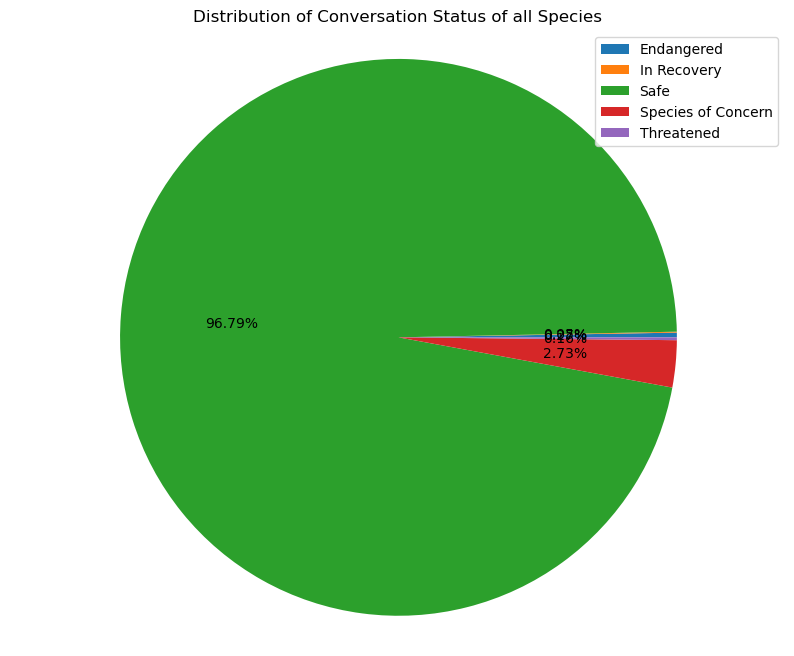

<Figure size 600x600 with 0 Axes>

In [30]:
cs_prop = species_observations.groupby('conservation_status').category.count().reset_index()
pop_category = species_observations.category.count()
cs_prop['category'] = cs_prop['category'] / pop_category
cs_prop.rename(columns = {'category': 'cs_proportion'}, inplace=True)
print(cs_prop)

plt.figure(figsize = (10,8))
plt.pie(cs_prop.cs_proportion, autopct = '%0.2f%%')
plt.legend(cs_prop.conservation_status)
plt.title('Distribution of Conversation Status of all Species')
plt.axis('equal')

plt.savefig('Distribution of Conservation Status of all Species.png')

plt.show()
plt.clf()

  conservation_status  cs_proportion
0          Endangered       0.084270
1         In Recovery       0.016854
3  Species of Concern       0.848315
4          Threatened       0.050562


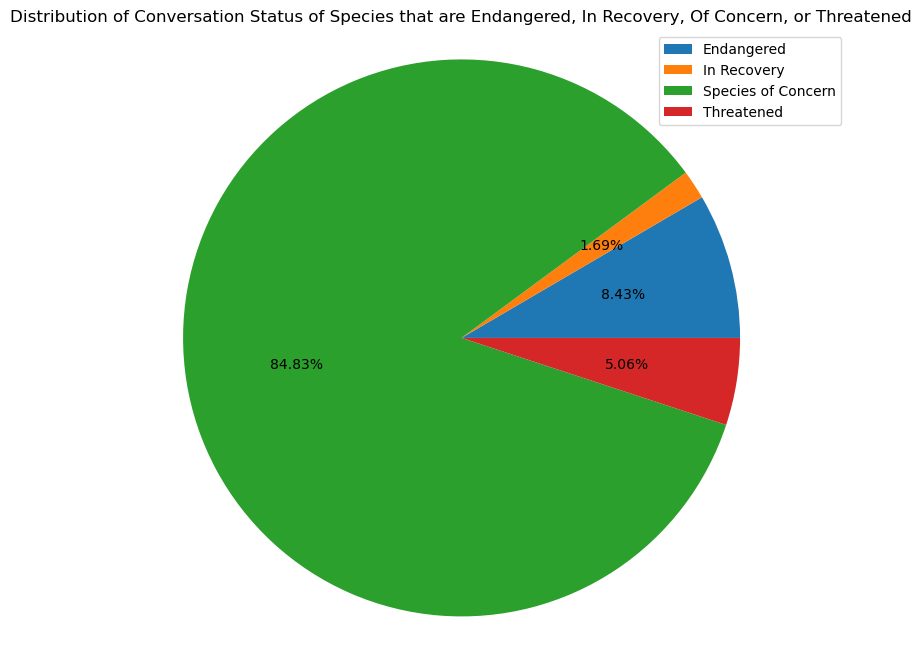

<Figure size 600x600 with 0 Axes>

In [31]:
not_safe = cs_prop[cs_prop.conservation_status != 'Safe']
not_safe.cs_proportion = not_safe.cs_proportion / not_safe.cs_proportion.sum()
print(not_safe)

plt.figure(figsize = (10,8))
plt.pie(not_safe.cs_proportion, autopct = '%0.2f%%')
plt.legend(not_safe.conservation_status)
plt.title('Distribution of Conversation Status of Species that are Endangered, In Recovery, Of Concern, or Threatened')
plt.axis('equal')

plt.savefig('Distribution of Conversation Status of Species that are not Safe.png')

plt.show()
plt.clf()

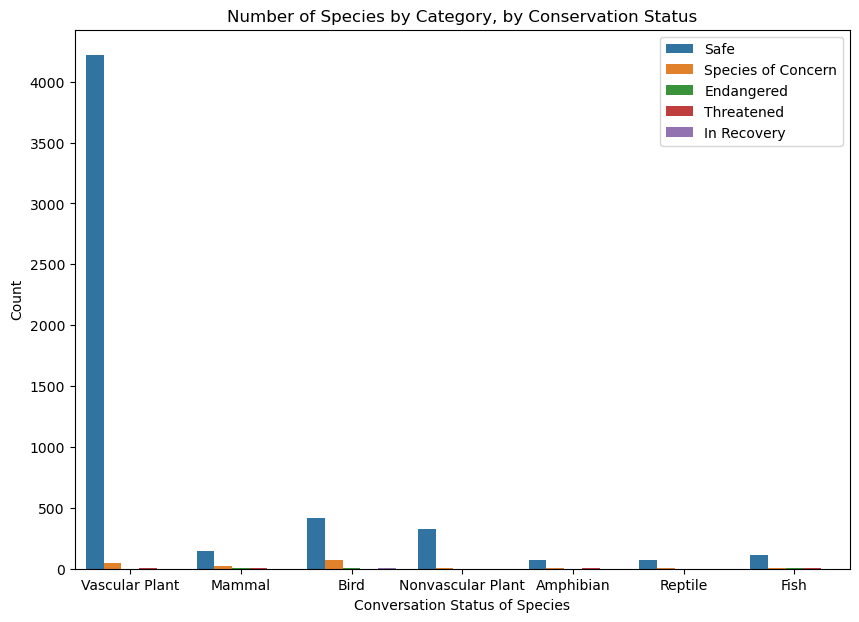

<Figure size 600x600 with 0 Axes>

In [32]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data = species_observations, x = 'category', hue = 'conservation_status')
ax.set_xticks(range(len(species_observations.category.unique())))
ax.set_xticklabels(species_observations.category.unique())
ax.set_xlabel('Conversation Status of Species')
ax.set_ylabel('Count')
ax.set_title('Number of Species by Category, by Conservation Status')
plt.legend(loc = 1)

plt.savefig('Number of Species by Category, by Conservation Status.png')

plt.show()
plt.clf()

<br>

### Which species were spotted the most at each park?

Generally, Vascular Plants were spotted the most at each park, followed by birds and nonvascular plants. Further research is recommended as this visualization may only be representative of the observations at hand and may not reflect field situation.

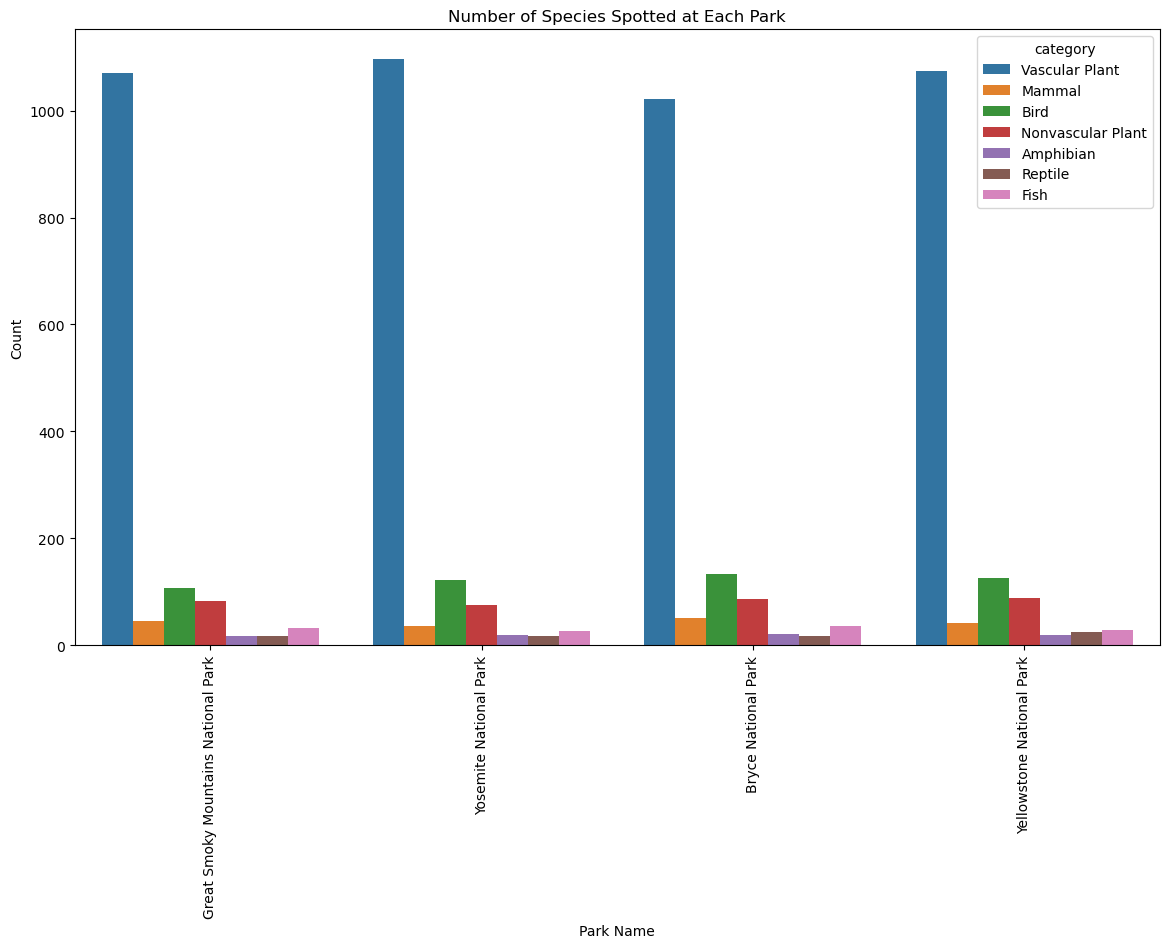

<Figure size 600x600 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(14,8))
ax = sns.countplot(data = species_observations, x = 'park_name', hue = 'category')
ax.set_xticklabels(species_observations['park_name'].unique(), rotation = 90, fontsize = 10)
ax.set_ylabel("Count")
ax.set_xlabel("Park Name")
ax.set_title('Number of Species Spotted at Each Park')

plt.savefig('Number of Species Spotted at Each Park.png')

plt.show()
plt.clf()